In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
# mass_example = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"]
# red_example = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["redshift"]

In [4]:
# big = jsm_halopull.MassMat("../../../data/cross_host/meta_data_psi3/", save=True)

In [5]:
# mass_mat_CLF = np.load("../../../data/cross_host/CLF_psi3/models.npz")["mass"]
# red_mat_CLF = np.load("../../../data/cross_host/CLF_psi3/models.npz")["redshift"]

In [6]:
# mass_mat_delta = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["mass"]
# red_mat_delta = np.load("../../../data/MW-analog/meta_data_psi3/models.npz")["redshift"]

In [7]:
# mass_mat_lognormal = np.load("../../../data/cross_host/lognorm_psi3/models.npz")["mass"]
# red_mat_lognormal = np.load("../../../data/cross_host/lognorm_psi3/models.npz")["redshift"]

In [8]:
fid_theta = [10.5, 2.0, 0.2, 0, 0, 0]
min_mass = 6.5

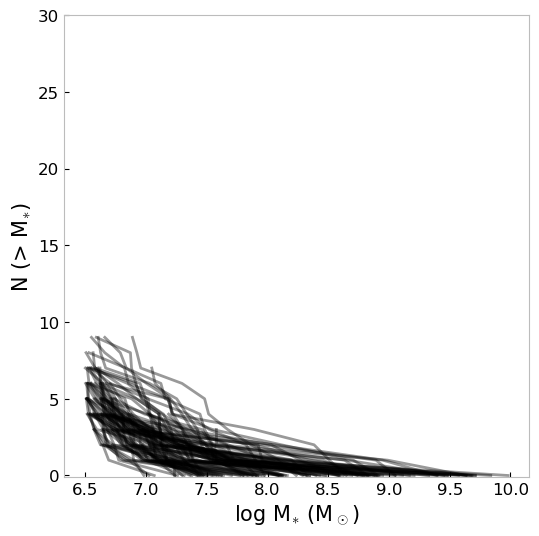

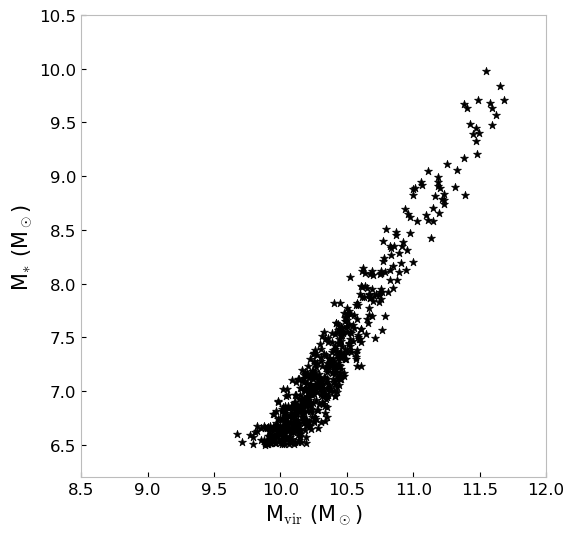

In [9]:
delta = jsm_models.init_data(fid_theta, "../../../SatGen/mcmc/new_stats/tot/mock_1/mock_data.npy")
delta.get_stats(min_mass=min_mass)
delta.plot_SMF()
delta.plot_SHMR()

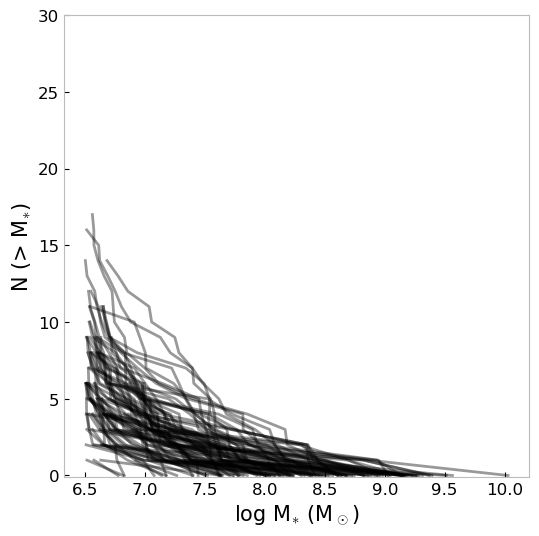

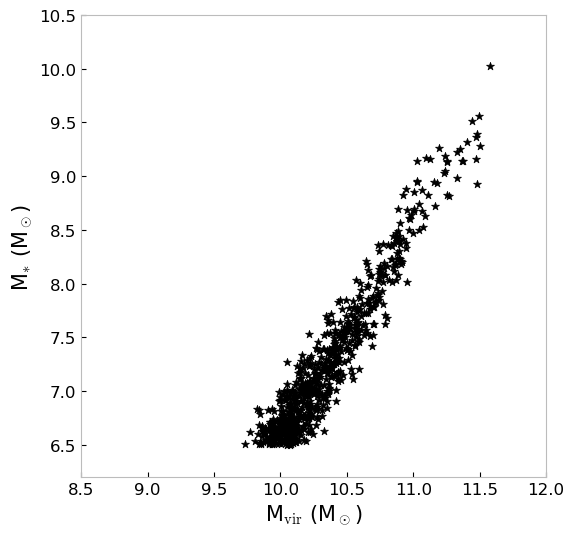

In [10]:
lognorm = jsm_models.init_data(fid_theta, "../../../data/cross_host/lognorm_psi3/mock_data.npy")
lognorm.get_stats(min_mass=min_mass)
lognorm.plot_SMF()
lognorm.plot_SHMR()

In [11]:
stat_delta = jsm_stats.SatStats_D(delta.lgMs, min_mass=min_mass)

stat_lognormal = jsm_stats.SatStats_D(lognorm.lgMs, min_mass=min_mass)

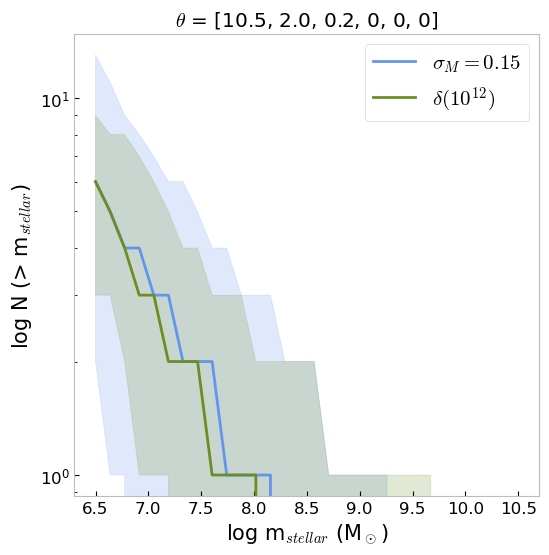

In [12]:
plt.figure(figsize=(6,6))
plt.title(f"$\\theta$ = {fid_theta}")

plt.plot(stat_lognormal.mass_bins, stat_lognormal.quant[1], label="$\\sigma_M = 0.15$", color="cornflowerblue")
plt.fill_between(stat_lognormal.mass_bins, y1=stat_lognormal.quant[0], y2=stat_lognormal.quant[2], alpha=0.2, color="cornflowerblue")

plt.plot(stat_delta.mass_bins, stat_delta.quant[1], label="$\\delta(10^{12})$", color="olivedrab")
plt.fill_between(stat_delta.mass_bins, y1=stat_delta.quant[0], y2=stat_delta.quant[2], alpha=0.2, color="olivedrab")

plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.yscale("log")
plt.legend(fontsize=15)
plt.show()


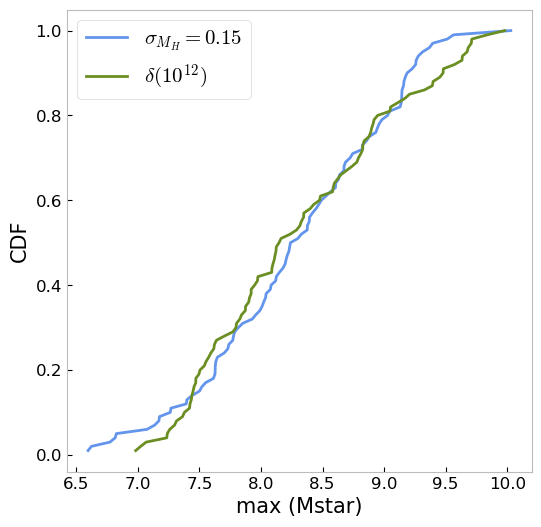

In [13]:
plt.figure(figsize=(6,6))
plt.plot(stat_lognormal.Msmax_sorted, stat_lognormal.ecdf_Msmax, color="cornflowerblue", label="$\\sigma_{M_H} = 0.15$")
plt.plot(stat_delta.Msmax_sorted, stat_delta.ecdf_Msmax, color="olivedrab", label="$\\delta(10^{12})$")

plt.xlabel("max (Mstar)", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.legend(fontsize=15)
plt.show()

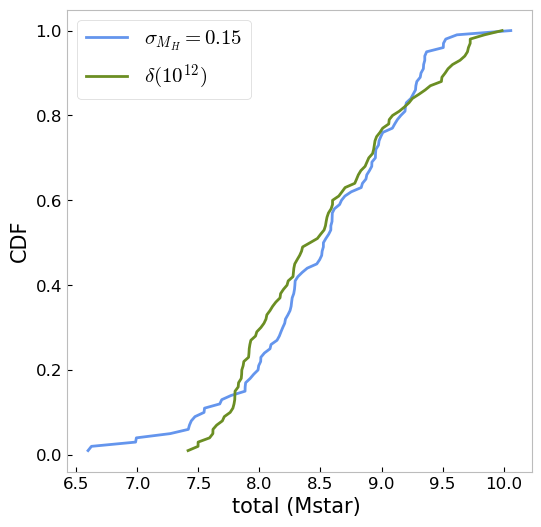

In [14]:
plt.figure(figsize=(6,6))
plt.plot(stat_lognormal.Mstot_sorted, stat_lognormal.ecdf_Mstot, color="cornflowerblue", label="$\\sigma_{M_H} = 0.15$")
plt.plot(stat_delta.Mstot_sorted, stat_delta.ecdf_Mstot, color="olivedrab", label="$\\delta(10^{12})$")

plt.xlabel("total (Mstar) ", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.legend(fontsize=15)
plt.show()

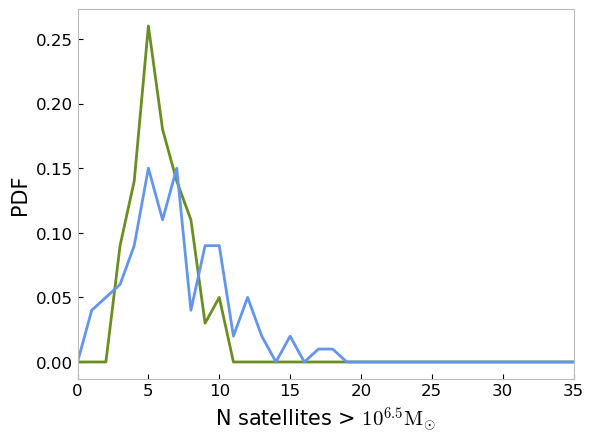

In [18]:
plt.plot(stat_delta.PNsat_range, stat_delta.PNsat, c="olivedrab")
plt.plot(stat_lognormal.PNsat_range, stat_lognormal.PNsat, c="cornflowerblue")
plt.xlabel("N satellites > $10^{"+str(lognorm.min_mass)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.xlim(0,35)
plt.show()

In [ ]:
# lgMs_CLF = jsm_SHMR.general(theta_fid, mass_mat_CLF, 0, 1)

# lgMs_delta = jsm_SHMR.general(theta_fid, mass_mat_delta, 0, 1)

# lgMs_lognormal = jsm_SHMR.general(theta_fid, mass_mat_lognormal, 0, 1)

In [ ]:
# plt.figure(figsize=(6,6))
# plt.title(f"$\\theta$ = {theta_fid}")

# plt.plot(stat_CLF.mass_bins, stat_CLF.quant[1], label="CLF", color="coral")
# plt.fill_between(stat_CLF.mass_bins, y1=stat_CLF.quant[0], y2=stat_CLF.quant[2], alpha=0.1, color="coral")

# plt.plot(stat_lognormal.mass_bins, stat_lognormal.quant[1], label="$\\sigma_M = 0.15$", color="cornflowerblue")
# plt.fill_between(stat_lognormal.mass_bins, y1=stat_lognormal.quant[0], y2=stat_lognormal.quant[2], alpha=0.2, color="cornflowerblue")

# plt.plot(stat_delta.mass_bins, stat_delta.quant[1], label="$\\delta(10^{12})$", color="olivedrab")
# plt.fill_between(stat_delta.mass_bins, y1=stat_delta.quant[0], y2=stat_delta.quant[2], alpha=0.2, color="olivedrab")

# plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
# plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
# plt.yscale("log")
# plt.legend(fontsize=15)
# plt.show()
